In [6]:
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import math

In [11]:
with open('D:\Downloads\Clone\Data Visualization\Homework_sampledata1.txt', 'r') as f:
    lines = f.readlines()
    col = []
    for line in lines:
        col.append(line.strip().split())

In [12]:
new_list = []
year = col[0]
day = []
for i in range(len(col)):
    new_col = [float(j) for j in col[i]] 
    day.append(new_col[0])
    del new_col[0]
    new_list.append(new_col)
del new_list[0]

columns = [list(index) for index in zip(*new_list)]

In [13]:
with_nan = []
for i in range(len(columns)):
    nan = np.where(np.array(columns[i]) == -99.0, np.nan,columns[i])
    with_nan.append(nan)
with_nan

[array([10.5,  9.8, 10.7, 15.1, 13.5, 16. , 15.8, 15.8, 18. , 20.2, 18.3,
        20.9, 17.4, 14.5, 11.5, 12.4, 13.3, 15.3, 17.8, 18.9, 16.1, 12.9,
        13.8, 11.6, 12.9, 12.5, 13.5, 13.3, 12. ,  9.6,  8.6]),
 array([ 7.3, 10.4, 11. , 12.9, 11.4, 11. , 10.3, 12.1, 11.7,  nan, 10.6,
        10.9, 11.3, 10.8, 12.2, 13.1, 11.6, 12.4, 12.5, 12.1, 11.2, 13.6,
        15.3, 17.2, 16.9, 11.8, 13. , 12.6, 10.4,  nan,  nan]),
 array([10.8, 10.7, 11.7, 12.4, 16. , 16.7, 17.1, 16.9, 17.8, 18. , 17.5,
        18.1, 19. , 18.5, 19.6, 21. , 22. , 19.6, 20.7, 22.9, 22.1, 18.1,
        15.3, 17. , 19.3, 18. , 19.8, 20.9, 22.2, 21.5, 19.3]),
 array([18.2, 18. , 18.8, 20.4, 22.4, 23.6, 23.6, 26.4, 23.8, 23.8, 24.3,
        24.8, 22.6, 23.7, 24.6, 22.3, 22. , 23. , 24. , 24.6, 25.4, 24. ,
        18.4, 20.9, 20.4, 21.5, 21.9, 21.7, 23.5, 24. ,  nan]),
 array([20. , 25.4, 25.4, 26.5, 24. , 24. , 25.1, 25.1, 22.5, 19.8, 22.4,
        23.2, 21.4, 22.6, 22.4, 25. , 26. , 20.8, 21.4, 23. , 24. , 24.5,
    

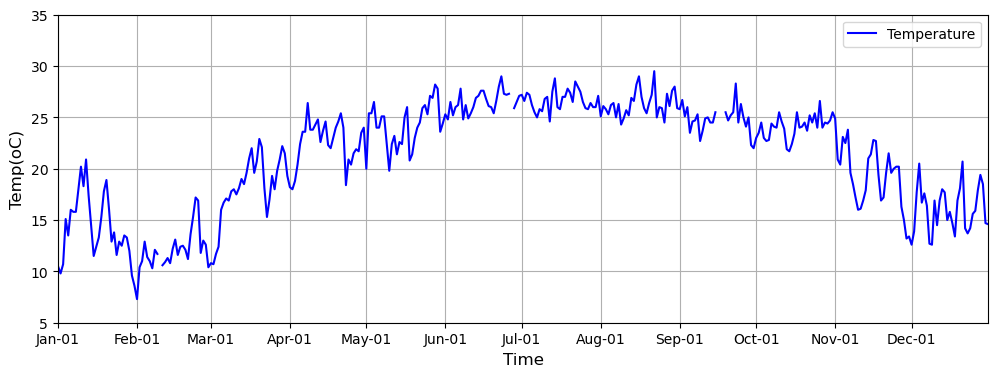

In [14]:
value_list = []
for i in range(len(with_nan)):
    l = with_nan[i].tolist()
    if (math.isnan(l[-1])):
        if (i==1) and (math.isnan(l[-2])):
            del l[-2:]
        else:
            del l[-1]
    value_list.append(l)

#flatten the list
flatten = [item for sublist in value_list for item in sublist]

#list of day
start_date = datetime.strptime("2008-Jan-01", "%Y-%b-%d")
end_date = datetime.strptime("2008-Dec-31", "%Y-%b-%d")

days = []
delta = timedelta(days=1)

current_date = start_date
while current_date <= end_date:
    days.append(current_date)
    current_date += delta

date_list = [d.strftime("%b-%d") for d in days]

#list of first day of each month
year = 2008
first_days = []
for month in range(1,13):
    day = date(year,month,1)
    first_days.append(day)
first_days = [day_obj.strftime("%b-%d") for day_obj in first_days]

#plot
plt.figure(figsize = (12,4))
plt.plot(date_list, flatten, 'b-')
plt.xticks(first_days)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Temp(oC)", fontsize = 12)
plt.grid(True)
plt.xlim(0,365)
plt.ylim(5,35)
plt.legend(["Temperature"])
plt.savefig("Figure1_1.png")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5180\3315761569.py:13: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


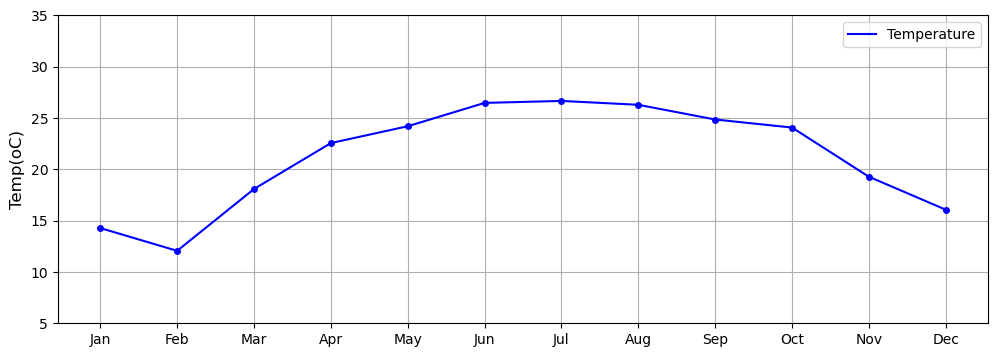

In [15]:
#calculate monthly mean
mean_data = [np.nanmean(with_nan[i].tolist()) for i in range(len(with_nan))]
months = [date(2008,m,1).strftime('%b') for m in range(1,13)]

#plot
plt.figure(figsize = (12,4))
plt.plot(months, mean_data,color='b',marker="o", ms = 4)
plt.xticks(months)
plt.ylabel("Temp(oC)", fontsize = 12)
plt.grid(True)
plt.ylim(5,35)
legend = plt.legend(["Temperature"], scatterpoints = 1)
for handle in legend.legendHandles:
    handle.set_marker("")
plt.savefig("Figure1_2.png")
plt.show()

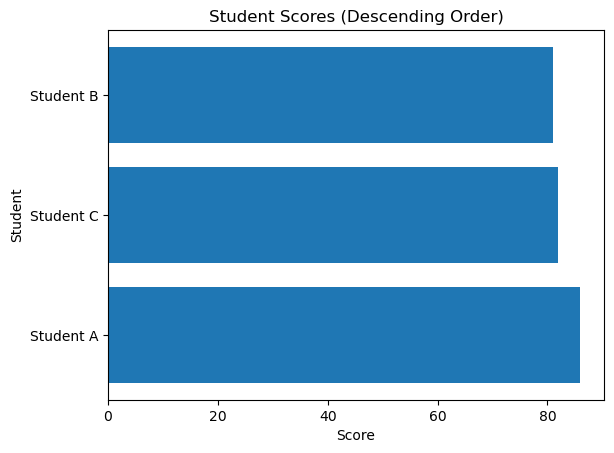

In [16]:
import matplotlib.pyplot as plt

# Step 1: Calculate the scores for each student
students = [
{"name": "Student A", "mid_term": 80, "final": 90},
{"name": "Student B", "mid_term": 75, "final": 85},
{"name": "Student C", "mid_term": 85, "final": 80}
]

for student in students:
    student["math_score"] = student["mid_term"] * 0.4 + student["final"] * 0.6
    student["literature_score"] = student["mid_term"] * 0.4 + student["final"] * 0.6

# Step 2: Calculate final score for each student
for student in students:
    student["final_score"] = (student["math_score"] + student["literature_score"]) / 2

# Step 3: Sort students' scores in descending order
students.sort(key=lambda x: x["final_score"], reverse=True)

# Step 4: Plot the scores on a graph
scores = [student["final_score"] for student in students]
names = [student["name"] for student in students]

plt.barh(names, scores)
plt.xlabel("Score")
plt.ylabel("Student")
plt.title("Student Scores (Descending Order)")
plt.show()

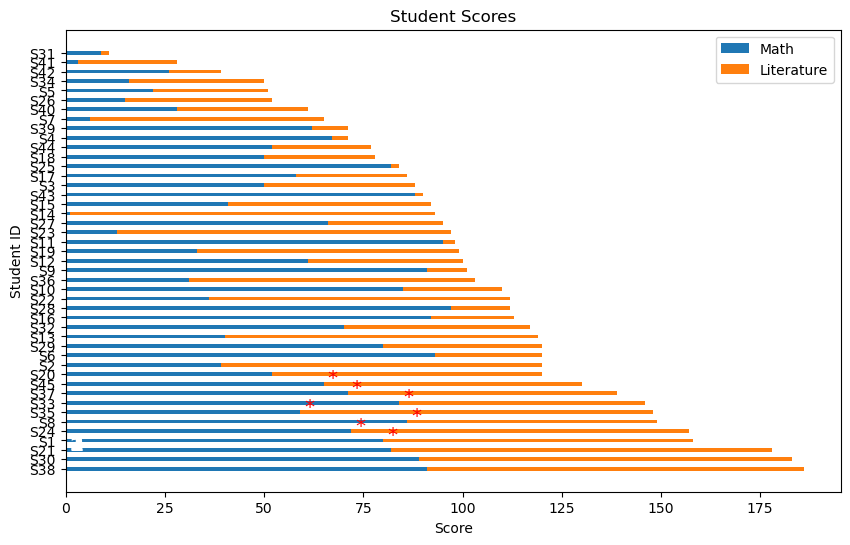

In [17]:
student_ids = ['S' + str(i) for i in range(1, 46)]
math_scores = np.random.randint(0, 101, 45)
literature_scores = np.random.randint(0, 101, 45)

# Calculate final scores
final_scores = (math_scores + literature_scores) / 2

# Sort the scores and student IDs in descending order
sorted_indexes = np.argsort(final_scores)[::-1]
sorted_student_ids = np.array(student_ids)[sorted_indexes]
sorted_math_scores = np.array(math_scores)[sorted_indexes]
sorted_literature_scores = np.array(literature_scores)[sorted_indexes]

# Plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4

# Plot math scores
ax.barh(sorted_student_ids, sorted_math_scores, bar_width, label='Math')
# Plot literature scores
ax.barh(sorted_student_ids, sorted_literature_scores, bar_width, left=sorted_math_scores,
label='Literature')

# Add labels and title
ax.set_xlabel('Score')
ax.set_ylabel('Student ID')
ax.set_title('Student Scores')

# Highlight top 3 students' math and literature scores
ax.text(1, 2, '1', fontsize='x-large', fontweight='bold', color='white')
ax.text(1, 2, '2', fontsize='x-large', fontweight='bold', color='white')
ax.text(1, 2, '3', fontsize='x-large', fontweight='bold', color='white')

# Highlight component scores from 4 to 10
for i in range(3, 10):
    ax.text(sorted_math_scores[i] + 1, i, '*', fontsize='x-large', color='red')

plt.legend()
plt.show()